In [2]:
# !conda install -c conda-forge tiledb
# !conda install -c conda-forge tiledb-py

In [3]:
import tiledb
import numpy as np
import matplotlib.pyplot as plt

In [4]:
tiledb.__version__

'0.11.2'

In [5]:
tiledb.libtiledb.version()

(2, 5, 2)

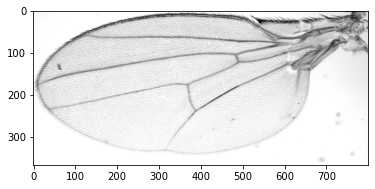

In [6]:
img = plt.imread('DrosophilaWing.tif')
plt.imshow(img,cmap="gray")

In [7]:
# imarray = np.array(im)
img.shape

(368, 800)

In [9]:
with tiledb.DenseArray.from_numpy("dense_array1" + "/array",  img) as A:
    pass

In [17]:
img.dtype

dtype('uint8')

## 2D array

In [38]:
# Create dimensions
d1 = tiledb.Dim(name="d1",domain=(1,img.shape[0]),tile=2, dtype = np.int16)
d2 = tiledb.Dim(name="d2",domain=(1,img.shape[1]),tile=2, dtype = np.int16)

# Create domain using the two dimensions
dom1 = tiledb.Domain(d1,d2)

# Create attribute
a = tiledb.Attr(name="image", dtype= np.int32)

# Create the array schema, spare = False to indicate a dense array
schema1 = tiledb.ArraySchema(domain=dom1, sparse=False, attrs=[a])

# Create the array on disk ( it will be intially empty )
tiledb.Array.create("dense_array1",schema1)

In [10]:
!tree dense_array1

dense_array1
├── __1638473725211_1638473725211_63c54eb8654444728326309c416a837a_10
│   ├── __fragment_metadata.tdb
│   └── a0.tdb
├── __1638473725211_1638473725211_63c54eb8654444728326309c416a837a_10.ok
├── __lock.tdb
├── __meta
├── __schema
│   └── __1638473719598_1638473719598_05cf320c6ef545bba4a82244ac8e6cf0
└── array
    ├── __1638543159897_1638543159897_0b5364c00c894f8390955a9358bbf1ac_10
    │   ├── __fragment_metadata.tdb
    │   └── a0.tdb
    ├── __1638543159897_1638543159897_0b5364c00c894f8390955a9358bbf1ac_10.ok
    ├── __lock.tdb
    ├── __meta
    └── __schema
        └── __1638543159887_1638543159887_2bc5eced06db4f67aa9447b2365ceb11

7 directories, 10 files


In [40]:
schema = tiledb.ArraySchema.load("dense_array1")
schema

ArraySchema(
  domain=Domain(*[
    Dim(name='d1', domain=(1, 368), tile='2', dtype='int16'),
    Dim(name='d2', domain=(1, 800), tile='2', dtype='int16'),
  ]),
  attrs=[
    Attr(name='image', dtype='int32', var=False, nullable=False),
  ],
  cell_order='row-major',
  tile_order='row-major',
  capacity=10000,
  sparse=False,
)

In [41]:
data = np.array([
    [1,2,3,4],
    [1,2,3,4],
    [1,2,3,4],
    [1,2,3,16]],dtype=np.int32)
data
img = np.array(img,dtype = np.int16)

In [42]:
data.shape

(4, 4)

In [43]:
with tiledb.open("dense_array1",'w') as A:
    print(A)
    A[:] = img

DenseArray(uri='dense_array1', mode=w, ndim=2)


In [44]:
!tree dense_array1

dense_array1
├── __1638473725211_1638473725211_63c54eb8654444728326309c416a837a_10
│   ├── __fragment_metadata.tdb
│   └── a0.tdb
├── __1638473725211_1638473725211_63c54eb8654444728326309c416a837a_10.ok
├── __lock.tdb
├── __meta
└── __schema
    └── __1638473719598_1638473719598_05cf320c6ef545bba4a82244ac8e6cf0

3 directories, 5 files


In [46]:
with tiledb.open("dense_array1",'r') as A:
    print(A[:]["image"])

[[250 251 251 ... 231 231 230]
 [249 249 249 ... 229 229 228]
 [248 248 248 ... 228 228 227]
 ...
 [255 255 255 ... 251 250 250]
 [255 255 255 ... 251 251 249]
 [255 255 255 ... 251 250 250]]


In [24]:
with tiledb.open("dense_array1",'r') as A:
    print(A[1:3]["a"])

[[1 2 3 4]
 [1 2 3 4]]


In [ ]:
with tiledb.open("dense_array1",'r') as A:
    print(A[1:3]["a"])